In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from collections import Counter
from pathlib import Path
from IPython.display import clear_output
import random

data_path = '/home/szelesteya/projects/EMBED_Open_Data/'
image_root_path = '/media/szelesteya/F824D4D024D492CC/EMBED-images/'
image_training_path = image_root_path + 'training/'
image_negative_path = image_root_path + 'negative-full'
image_positive_path = image_root_path + 'positive-full'
tables_path = data_path + 'tables/'
image_croped_neg_path = image_training_path + 'negative/' 

df_pos = pd.read_csv(data_path + 'positive_empirical_png.csv')
df_neg = pd.read_csv(data_path + 'negative_empirical_png.csv')

fix_resolution = [3328,4096]
crop_size = [700, 700]

In [18]:
def get_size_of_image(image_array):
    height = image_array.shape[0]
    width = image_array.shape[1]
    full_resolution = height * width
    diameter = math.sqrt( height ** 2 + width ** 2)
    dark_area = np.sum(image_array == 0)
    return [f'{height} x {width}', [height, width], full_resolution, diameter, dark_area]

def crop_black_part(image_array):
    # Cropping every column that doesn't contain tissue
    not_dark = np.where(image_array != 0, 1, 0)
    tissue_distrib_x = np.sum(not_dark, axis=0) / not_dark.shape[0]
    tissue_distri_y = np.sum(not_dark, axis=1) / not_dark.shape[1]
    is_tissue_x = np.where(tissue_distrib_x > 0.1, 1, 0)
    is_tissue_y = np.where(tissue_distri_y > 0.1, 1, 0)

    first_tissue_x = np.where(is_tissue_x == 1)[0][0]
    last_tissue_x = np.where(is_tissue_x == 1)[-1][-1]
    first_tissue_y = np.where(is_tissue_y == 1)[0][0]
    last_tissue_y = np.where(is_tissue_y == 1)[-1][-1]

    return image_array[first_tissue_y:last_tissue_y,first_tissue_x:last_tissue_x]


def generate_crop_path(index, roi_num):
    return image_croped_pos_path + f"{index}_{roi_num}_cropped"

In [19]:
def crop_negative_array(image_array):
    tissue_array = np.array(crop_black_part(image_array))
    tissue_width = tissue_array.shape[1]
    tissue_height = tissue_array.shape[0]
    x_offset_1 = random.randint(0, tissue_width - crop_size[1])
    x_offset_2 = random.randint(0, tissue_width - crop_size[1])
    y_half_point = round((tissue_height - crop_size[0]) / 2)
    y_offset_1 = random.randint(0, y_half_point)
    y_offset_2 = random.randint(y_half_point, tissue_height - crop_size[0])
    return [tissue_array[y_offset_1:(y_offset_1 + crop_size[0]), x_offset_1:(x_offset_1 + crop_size[1])], tissue_array[y_offset_2:(y_offset_2 + crop_size[0]), x_offset_2:(x_offset_2 + crop_size[1])]]

In [32]:
def crop_negative(negative_row, idx):
    path_0 = f"{image_croped_neg_path}{idx}_0"
    path_1 = f"{image_croped_neg_path}{idx}_1"
    image = Image.open(negative_row['png_path'])
    resize_image_array = np.array(image.resize(fix_resolution))
    tissue_image_array = crop_black_part(resize_image_array)
    crop_1, crop_2 = crop_negative_array(tissue_image_array)
    print(f"Saving images {path_0[0:-2]}")
    plt.imshow(crop_1, cmap='gray')
    plt.axis('off')
    plt.savefig(path_0,bbox_inches='tight',pad_inches=0)
    plt.imshow(crop_2, cmap='gray')
    plt.axis('off')
    plt.savefig(path_1,bbox_inches='tight',pad_inches=0)

Cropping image number 51 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-images/training/negative/51
Cropping image number 52 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-images/training/negative/52
Cropping image number 53 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-images/training/negative/53
Cropping image number 54 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-images/training/negative/54
Cropping image number 55 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-images/training/negative/55
Cropping image number 56 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-images/training/negative/56
Cropping image number 57 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-images/training/negative/57
Cropping image number 58 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-images/training/negative/58
Cropping image number 59 / 300
Saving images /media/szelesteya/F824D4D024D492CC/EMBED-im

FileNotFoundError: [Errno 2] No such file or directory: '/media/szelesteya/F824D4D024D492CC/EMBED-images/negative-full/32958779_neg_conv.png'

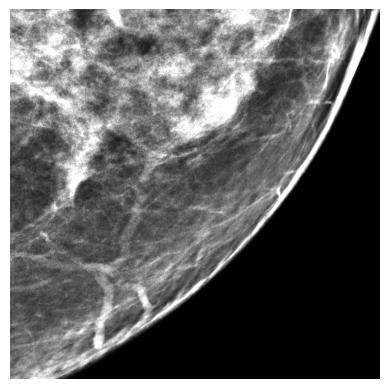

In [35]:
for i in range(51,300):
    print(f"Cropping image number {i} / {300}")
    crop_negative(df_neg.loc[i,:], i)

In [31]:
df_neg

,empi_anon,acc_anon,side,age_at_study,relative_dcm_path,calc_find,calc_distrib,other_find,num_find,eth_desc,study_date_anon,png_path
0,29011563,1572834723540517,R,82.651937,cohort_1/29011563/1.2.846.113979.3.61.1.622904...,NaN,NaN,NaN,1,African American or Black,2021-02-17,/media/szelesteya/F824D4D024D492CC/EMBED-image...
1,11485524,6356263291812846,L,74.038481,cohort_1/11485524/1.2.844.113973.3.64.1.622065...,NaN,NaN,NaN,1,African American or Black,2021-02-10,/media/szelesteya/F824D4D024D492CC/EMBED-image...
2,41042249,9346948292263998,R,67.763198,cohort_2/41042249/1.2.845.113978.3.60.1.621182...,NaN,NaN,NaN,1,Caucasian or White,2021-01-31,/media/szelesteya/F824D4D024D492CC/EMBED-image...
3,12927057,6114291372605113,R,68.045203,cohort_2/12927057/1.2.841.113975.3.61.1.622750...,NaN,NaN,NaN,1,Caucasian or White,2021-01-24,/media/szelesteya/F824D4D024D492CC/EMBED-image...
4,60191895,9641409346677793,R,62.073828,cohort_1/60191895/1.2.843.113978.3.64.1.621798...,NaN,NaN,NaN,1,African American or Black,2021-01-23,/media/szelesteya/F824D4D024D492CC/EMBED-image...
...,...,...,...,...,...,...,...,...,...,...,...,...
1941,10412436,4784297769562945,R,80.519107,cohort_2/10412436/1.2.842.113970.3.61.1.473439...,NaN,NaN,NaN,1,Caucasian or White,2012-09-19,/media/szelesteya/F824D4D024D492CC/EMBED-image...
1942,72504682,7661551911935583,R,57.318083,cohort_2/72504682/1.2.847.113977.3.66.1.474765...,NaN,NaN,NaN,1,Asian,2012-09-18,/media/szelesteya/F824D4D024D492CC/EMBED-image...
1943,79148688,5277430237922202,L,56.923825,cohort_2/79148688/1.2.847.113976.3.62.1.473578...,NaN,NaN,NaN,1,Caucasian or White,2012-08-26,/media/szelesteya/F824D4D024D492CC/EMBED-image...
1944,60319885,1310615916903458,R,59.650780,cohort_2/60319885/1.2.849.113976.3.64.1.474447...,NaN,NaN,NaN,1,African American or Black,2012-08-23,/media/szelesteya/F824D4D024D492CC/EMBED-image...
